# Algunas pruebas de pre-procesado:

### Uso de la media o la mediana

In [59]:
from statistics import mean, median

Creamos un conjunto de datos, donde uno de ellos podria ser considerado un outlier (80):

In [60]:
data = [17, 80, 22, 16,20]

Calculamos la media...

In [3]:
mn = mean(data)

In [4]:
print(data)

[17, 80, 22, 16, 20]


In [5]:
print(mn)

31


Notese como el valor de la media esta un poco alejado de los valores que parecen estar en el mismo rango i.e 17, 22, 16 y 20:

In [6]:
data2 = [17, 22, 16,20]

In [7]:
mn2 = mean(data2)

In [8]:
mn2

18.75

De hecho, en el último cálculo se observa como esos valores i.e sacando el (80), efectivamente están en un rango medio de 18.75.

Ahora veamos el efecto de calcular la mediana con los datos iniciales (incluyendo el 80):

In [9]:
md = median(data)

In [10]:
md

20

Nótese como el efecto del outlier (80) cuando se recurre al uso de la mediana, es menor. Conclusión: se usa la mediana en vez de la media cuando queremos minimizar los efectos de los outliers en los datos.

### Caso de Pre-procesado con DIABETES

In [65]:
import pandas as pd
from pandas import read_csv
import numpy as np

Exportamos el dataset (recordar uso de RAW):

In [66]:
dataset = pd.read_csv('https://raw.githubusercontent.com/fmezacr/DataScienceTEC/master/Clase2/pima-indians-diabetes.csv')

Lo primero, validar el tamaño:

In [67]:
dataset.shape

(767, 9)

Visualizar los 20 primeros datos:

In [68]:
print(dataset.head(20))

     6  148  72  35    0  33.6  0.627  50  1
0    1   85  66  29    0  26.6  0.351  31  0
1    8  183  64   0    0  23.3  0.672  32  1
2    1   89  66  23   94  28.1  0.167  21  0
3    0  137  40  35  168  43.1  2.288  33  1
4    5  116  74   0    0  25.6  0.201  30  0
5    3   78  50  32   88  31.0  0.248  26  1
6   10  115   0   0    0  35.3  0.134  29  0
7    2  197  70  45  543  30.5  0.158  53  1
8    8  125  96   0    0   0.0  0.232  54  1
9    4  110  92   0    0  37.6  0.191  30  0
10  10  168  74   0    0  38.0  0.537  34  1
11  10  139  80   0    0  27.1  1.441  57  0
12   1  189  60  23  846  30.1  0.398  59  1
13   5  166  72  19  175  25.8  0.587  51  1
14   7  100   0   0    0  30.0  0.484  32  1
15   0  118  84  47  230  45.8  0.551  31  1
16   7  107  74   0    0  29.6  0.254  31  1
17   1  103  30  38   83  43.3  0.183  33  0
18   1  115  70  30   96  34.6  0.529  32  1
19   3  126  88  41  235  39.3  0.704  27  0


Visualizar los 20 últimos datos:

In [69]:
print(dataset.tail(20))

      6  148  72  35    0  33.6  0.627  50  1
747   3  187  70  22  200  36.4  0.408  36  1
748   6  162  62   0    0  24.3  0.178  50  1
749   4  136  70   0    0  31.2  1.182  22  1
750   1  121  78  39   74  39.0  0.261  28  0
751   3  108  62  24    0  26.0  0.223  25  0
752   0  181  88  44  510  43.3  0.222  26  1
753   8  154  78  32    0  32.4  0.443  45  1
754   1  128  88  39  110  36.5  1.057  37  1
755   7  137  90  41    0  32.0  0.391  39  0
756   0  123  72   0    0  36.3  0.258  52  1
757   1  106  76   0    0  37.5  0.197  26  0
758   6  190  92   0    0  35.5  0.278  66  1
759   2   88  58  26   16  28.4  0.766  22  0
760   9  170  74  31    0  44.0  0.403  43  1
761   9   89  62   0    0  22.5  0.142  33  0
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0


Resumen estadístico de los datos:

In [70]:
print(dataset.describe())

                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

            0.627          50           1  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%   

Validar la cantidad de ceros por columnas:

In [71]:
print((dataset == 0).astype(int).sum())

6        111
148        5
72        35
35       227
0        373
33.6      11
0.627      0
50         0
1        500
dtype: int64


Reemplazar los ceros por NaN:

In [72]:
dataset[['6','148','72','35','0','33.6']] = dataset[['6','148','72','35','0','33.6']].replace(0,np.NaN)

Validar de nuevo que todos los ceros fueron reemplazados por NaN:

In [73]:
print((dataset == 0).astype(int).sum())

6          0
148        0
72         0
35         0
0          0
33.6       0
0.627      0
50         0
1        500
dtype: int64


In [74]:
print(dataset.tail(20))

        6    148    72    35      0  33.6  0.627  50  1
747   3.0  187.0  70.0  22.0  200.0  36.4  0.408  36  1
748   6.0  162.0  62.0   NaN    NaN  24.3  0.178  50  1
749   4.0  136.0  70.0   NaN    NaN  31.2  1.182  22  1
750   1.0  121.0  78.0  39.0   74.0  39.0  0.261  28  0
751   3.0  108.0  62.0  24.0    NaN  26.0  0.223  25  0
752   NaN  181.0  88.0  44.0  510.0  43.3  0.222  26  1
753   8.0  154.0  78.0  32.0    NaN  32.4  0.443  45  1
754   1.0  128.0  88.0  39.0  110.0  36.5  1.057  37  1
755   7.0  137.0  90.0  41.0    NaN  32.0  0.391  39  0
756   NaN  123.0  72.0   NaN    NaN  36.3  0.258  52  1
757   1.0  106.0  76.0   NaN    NaN  37.5  0.197  26  0
758   6.0  190.0  92.0   NaN    NaN  35.5  0.278  66  1
759   2.0   88.0  58.0  26.0   16.0  28.4  0.766  22  0
760   9.0  170.0  74.0  31.0    NaN  44.0  0.403  43  1
761   9.0   89.0  62.0   NaN    NaN  22.5  0.142  33  0
762  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63  0
763   2.0  122.0  70.0  27.0    NaN  36.8  0.340

Validar la cantidad de NaN por columnas:

In [75]:
print(dataset.isnull().sum())

6        111
148        5
72        35
35       227
0        373
33.6      11
0.627      0
50         0
1          0
dtype: int64


Reemplazar los NaN por el valor de la mediana (o media) de la columna:

In [76]:
dataset.fillna(dataset.median(), inplace=True)

In [77]:
print(dataset.tail(20))

        6    148    72    35      0  33.6  0.627  50  1
747   3.0  187.0  70.0  22.0  200.0  36.4  0.408  36  1
748   6.0  162.0  62.0  29.0  125.0  24.3  0.178  50  1
749   4.0  136.0  70.0  29.0  125.0  31.2  1.182  22  1
750   1.0  121.0  78.0  39.0   74.0  39.0  0.261  28  0
751   3.0  108.0  62.0  24.0  125.0  26.0  0.223  25  0
752   4.0  181.0  88.0  44.0  510.0  43.3  0.222  26  1
753   8.0  154.0  78.0  32.0  125.0  32.4  0.443  45  1
754   1.0  128.0  88.0  39.0  110.0  36.5  1.057  37  1
755   7.0  137.0  90.0  41.0  125.0  32.0  0.391  39  0
756   4.0  123.0  72.0  29.0  125.0  36.3  0.258  52  1
757   1.0  106.0  76.0  29.0  125.0  37.5  0.197  26  0
758   6.0  190.0  92.0  29.0  125.0  35.5  0.278  66  1
759   2.0   88.0  58.0  26.0   16.0  28.4  0.766  22  0
760   9.0  170.0  74.0  31.0  125.0  44.0  0.403  43  1
761   9.0   89.0  62.0  29.0  125.0  22.5  0.142  33  0
762  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63  0
763   2.0  122.0  70.0  27.0  125.0  36.8  0.340

Como se observa, los nombre de las columnas corresponden a números, se puede asumir que dichos valores corresponden a una fila de datos únicamente si los datos los hemos generado nosotros mismos o bien si el especialista del campo de aplicación nos lo ha indicado. **NO SE DEBE DAR POR CIERTO QUE SON DATOS**, algunas columnas en aplicaciones médicas y otras áreas corresponden a códigos numéricos, de existir la duda lo mejor es renombrar los valores por lo que representa la columna a partir de la fuente de los datos:   

In [80]:
new_dataset = dataset.rename({'6':'preg'}, axis = 'columns')

In [82]:
new_dataset.head(10)

,preg,148,72,35,0,33.6,0.627,50,1
0,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
1,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30,0
5,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
6,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29,0
7,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
8,8.0,125.0,96.0,29.0,125.0,32.3,0.232,54,1
9,4.0,110.0,92.0,29.0,125.0,37.6,0.191,30,0


Otra forma, agregando todos los nombres de la columnas de una vez:

In [87]:
dataset.columns = ['Preg','Gluc','BP','SkinT','Insulin','BMI','DPF','Age','Outcome']

In [89]:
dataset.head(10)

,Preg,Gluc,BP,SkinT,Insulin,BMI,DPF,Age,Outcome
0,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
1,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30,0
5,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
6,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29,0
7,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
8,8.0,125.0,96.0,29.0,125.0,32.3,0.232,54,1
9,4.0,110.0,92.0,29.0,125.0,37.6,0.191,30,0


### Truco:

Si tenemos por ejemplo una serie de datos en excel, como la de acá:

<img src='https://raw.githubusercontent.com/fmezacr/DataScienceTEC/master/Clase2/excel1.png' width='300px'>

Para llevarlos a un dataframe, simplemente le damos copiar y lo pegamos en el notebook (ahora como dataframe), usando:

In [90]:
clip = pd.read_clipboard()

In [91]:
clip

,a,b
0,1,9
1,2,8
2,3,7
3,4,6
4,5,5
5,6,4
6,7,3
7,8,2
8,9,1


Finalmente, tenemos el caso de la interpolación:

In [32]:
df = pd.DataFrame({'a' : [100,120,130,np.nan,140], 'b' : [9,9,np.nan,7.5,6.5]})

In [33]:
df

,a,b
0,100.0,9.0
1,120.0,9.0
2,130.0,NaN
3,NaN,7.5
4,140.0,6.5


In [35]:
df.interpolate()

,a,b
0,100.0,9.00
1,120.0,9.00
2,130.0,8.25
3,135.0,7.50
4,140.0,6.50


# Caso TITANIC

In [96]:
import numpy as np
import pandas as pd

In [97]:
data =  pd.read_csv('https://raw.githubusercontent.com/fmezacr/DataScienceTEC/master/Clase2/titanic.csv')

In [98]:
data.shape

(891, 12)

In [99]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Podemos seleccionar el arreglo de columas que sean de nuestro interés:

In [100]:
cols_to_use = ['Pclass', 'Sex', 'Age','Fare','Survived']

In [101]:
data = data[cols_to_use]

In [102]:
data.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
5,3,male,NaN,8.4583,0
6,1,male,54.0,51.8625,0
7,3,male,2.0,21.0750,0
8,3,female,27.0,11.1333,1
9,2,female,14.0,30.0708,1


Validamos la existencia de NaN:

In [103]:
data.isnull().values.any()

True

Validamos el tamaño original del dataset:

In [44]:
data.shape

(891, 5)

Decidimos eliminar cualquier instancia que contenga al menos, un NaN:

In [104]:
data = data.dropna()

y verificamos el tamaño final del dataset:

In [47]:
data.shape

(714, 5)

Notamos como 177 instancias fueron eliminadas.

Qué sigue? Debemos de verificar si hay alguna variable categórica, de existir debemos de binarizarla:

In [105]:
data['Sex'] = data['Sex'].replace({'male' : 0, 'female' : 1})

In [106]:
data.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
6,1,0,54.0,51.8625,0
7,3,0,2.0,21.0750,0
8,3,1,27.0,11.1333,1
9,2,1,14.0,30.0708,1
10,3,1,4.0,16.7000,1


Finalmente como etapa previa a los algoritmos de aprendizaje, partimos nuestro dataset en *training* y *testing*:

In [51]:
from sklearn.model_selection import train_test_split

Creamos nuestro conjunto de features (X) y labels (y):

In [52]:
features = data[['Sex','Age','Fare']]
labels = data['Survived']

In [53]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, random_state = 13)

In [55]:
data.shape

(714, 5)

In [54]:
X_train.shape

(535, 3)

In [57]:
y_test.shape

(179,)

Nótese como por defecto el tamaño de *training* es del 75% (535/714) y *testing* del 25% (179/714), si deseamos una partición distinta, por ejemplo 80% *training* y 20% *testing*, lo hacemos de la siguiente manera:

In [108]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13) 

In [109]:
X_train.shape

(571, 3)

Efectivamente ahora 571 corresponde al 80% de 714.

### Truco: (en PANDAS 0.25)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/fmezacr/DataScienceTEC/master/Clase2/pima-indians-diabetes.csv')

In [17]:
dataset.columns = ['Preg','Gluc','BP','SkinT','Insulin','BMI','DPF','Age','Outcome']

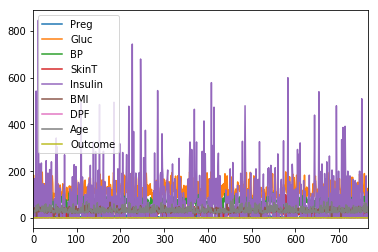

In [18]:
dataset.plot()

(10, 20)

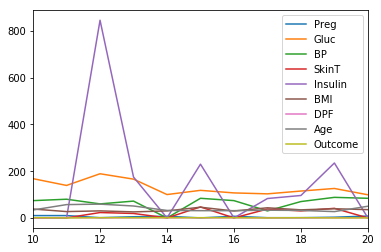

In [19]:
dataset.plot()
plt.xlim(10,20)

(10, 30)

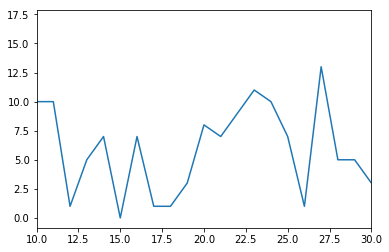

In [21]:
dataset['Preg'].plot()
plt.xlim(10,30)

(10, 30)

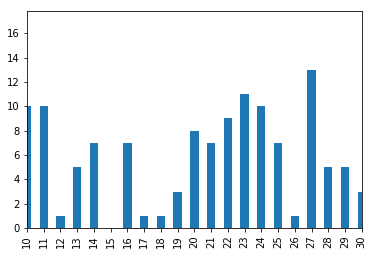

In [20]:
dataset['Preg'].plot.bar()
plt.xlim(10,30)